In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [12]:
df = pd.read_csv('Data/shopeep_koreantop_clothing_shop_data.csv')
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


In [6]:
df.describe()

,pk_shop,shopid,join_day,join_year,item_count,follower_count,response_rate,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
count,7.460000e+02,7.460000e+02,746.000000,746.000000,746.000000,7.460000e+02,746.000000,746.000000,7.460000e+02,746.000000,740.000000,746.000000,746.000000
mean,1.367361e+16,2.032431e+08,16.663539,2018.985255,482.886059,9.989943e+04,78.044236,2049.020107,9.720686e+04,4175.920912,4.740811,0.269437,0.005362
std,8.764287e+15,1.425216e+08,8.897669,1.528625,604.620925,2.627164e+05,22.534672,9232.920595,3.417680e+05,15174.949308,0.152888,0.443965,0.073078
min,2.021061e+14,1.083822e+06,1.000000,2015.000000,1.000000,6.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,4.060000,0.000000,0.000000
25%,2.021063e+15,5.034141e+07,9.000000,2017.250000,145.500000,2.024000e+03,67.000000,15.250000,7.002500e+02,35.000000,4.640000,0.000000,0.000000
50%,2.021062e+16,2.054244e+08,17.000000,2019.000000,311.000000,1.690450e+04,86.000000,117.000000,7.320000e+03,351.500000,4.780000,0.000000,0.000000
75%,2.021063e+16,3.182721e+08,24.000000,2020.000000,526.000000,6.644100e+04,96.000000,676.250000,3.484100e+04,1605.500000,4.860000,1.000000,0.000000
max,2.021071e+16,4.689597e+08,31.000000,2021.000000,4739.000000,2.039888e+06,100.000000,102833.000000,3.403406e+06,153076.000000,5.000000,1.000000,1.000000


## Yêu cầu vẽ biểu đồ kết hợp để trực quan hóa thông tin sau:

- Vẽ biểu đồ:
    - So sánh số lượng shop gia nhập theo các năm.
    - Xu hướng của số lượng shop gia nhập theo từng tháng trong từng năm.
- Vẽ biểu đồ thể hiện mối quan hệ giữa 
    - Tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt
    - Thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá tốt.
- Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình.                                                       

### Vẽ biểu đồ:
- So sánh số lượng shop gia nhập theo các năm.
- Xu hướng của số lượng shop gia nhập theo từng tháng trong từng năm.

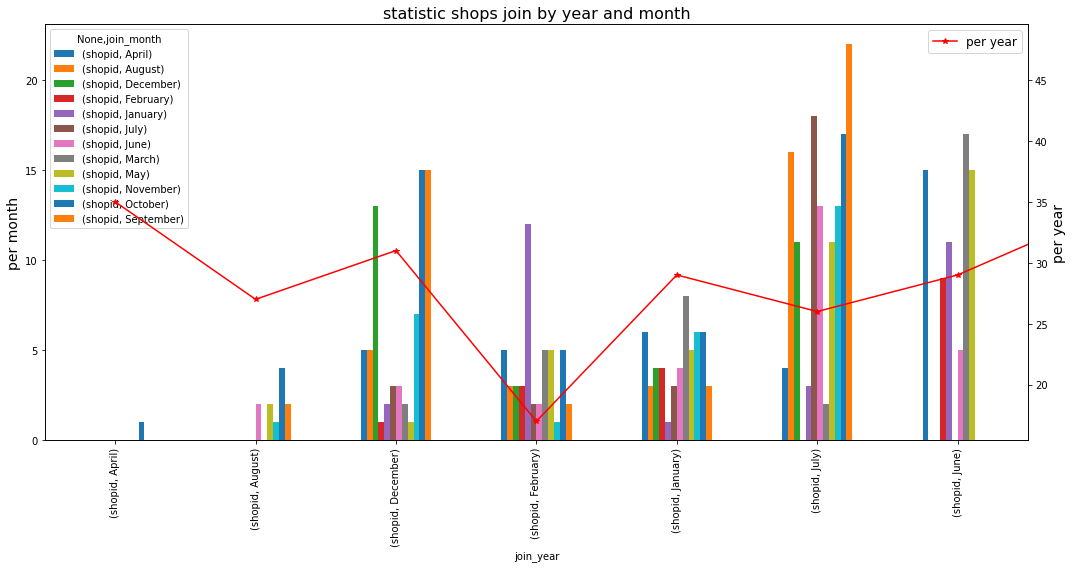

In [49]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True

shops_join =  df.groupby(by = ['join_year','join_month'])[['shopid']].nunique()
shops_join = shops_join.unstack(level = 1)
shops_per_year = shops_join.sum(axis = 0)

# visualazation
shops_join.plot.bar()
ax1 = plt.gca()
ax2 = ax1.twinx()
shops_per_year.plot.line(marker = '*',ax = ax2, color = 'red', label = 'per year')
ax1 .set_ylabel('per month', fontsize = 14)
ax2.set_ylabel('per year', fontsize = 14)
plt.legend(loc = 1, prop={'size': 12})
plt.title('statistic shops join by year and month', fontsize = 16)
plt.show()

### Vẽ biểu đồ thể hiện mối quan hệ giữa: 
- Tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt
- Thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá tốt.

In [60]:
df['response_time'] = pd.to_datetime(df['response_time'].str.strip(), format = '%H:%M:%S')

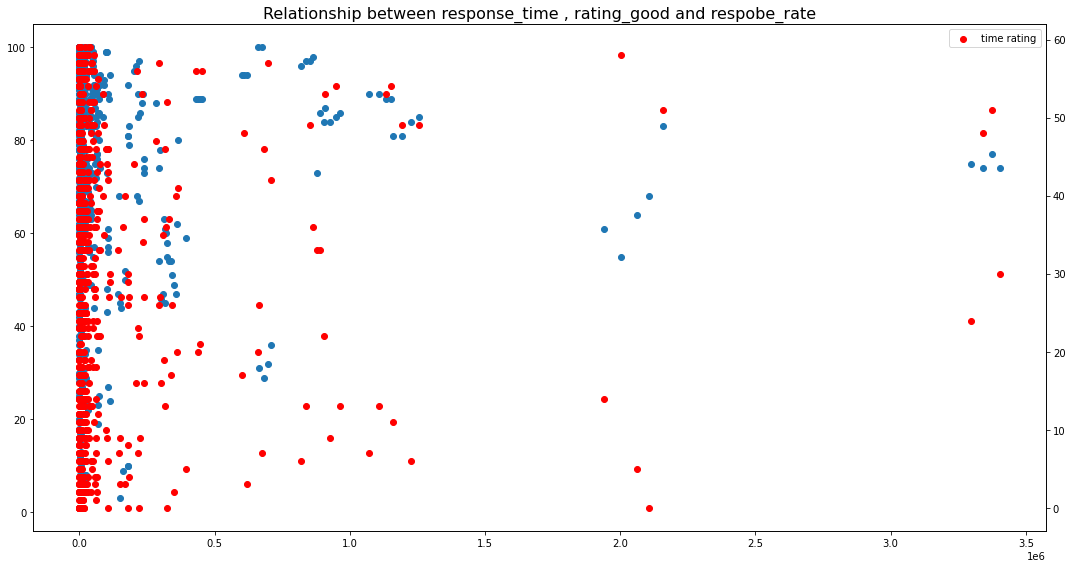

In [62]:
plt.scatter(x = df['rating_good'], y = df['response_rate'], label = 'customer rating')
ax1 = plt.gca()
ax2 = plt.twinx()
ax2.scatter(x = df['rating_good'], y = df['response_time'].dt.second, label = 'time rating', color = 'red')
plt.legend()
plt.title('Relationship between response_time , rating_good and respobe_rate', fontsize = 16)
plt.show()

###   Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình. 

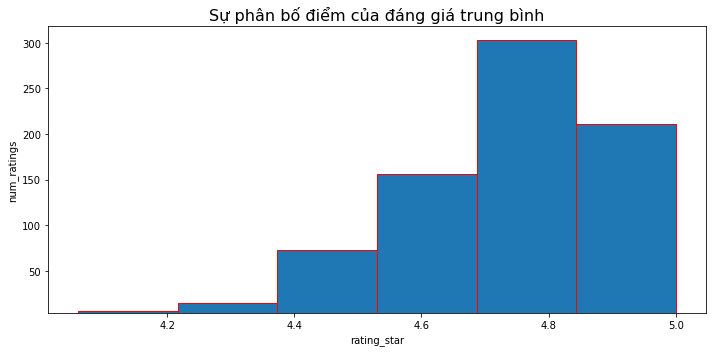

In [66]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.hist(x = df['rating_star'], bins = 6 , edgecolor = 'red', bottom = 4)
plt.title('Sự phân bố điểm của đáng giá trung bình', fontsize = 16)
plt.xlabel('rating_star')
plt.ylabel('num_ratings')
plt.show()